# LSTM for Time Series Analysis


---


The task is to predict the electricity usage of the households using the data provided. 
- LSTM or a Long Short Term Memory units is a type of Recurrent Neural Network that is capeable to remember past values inputted to the network.
- I will be going to use a multi-layered LSTM RNN to predict an unknown value that is preceeded by a sequence of lookback values that are inputs to the LSTM.
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/The_LSTM_cell.png/1024px-The_LSTM_cell.png)

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [0]:
df = pd.read_csv("processed_2.csv")

In [0]:
data = df.KWh_18.values 


data = data.astype('float32')
data = np.reshape(data, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.80)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [0]:
#create dataset helper function for reshaping/slicing the dataset to fit our LSTM model

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [41]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 15615 samples, validate on 3900 samples
Epoch 1/20
15615/15615 [==============================] - 2s 111us/step - loss: 0.0060 - val_loss: 0.0029
Epoch 2/20
15615/15615 [==============================] - 1s 45us/step - loss: 0.0045 - val_loss: 0.0025
Epoch 3/20
15615/15615 [==============================] - 1s 47us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 4/20
15615/15615 [==============================] - 1s 43us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 5/20
15615/15615 [==============================] - 1s 40us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 6/20
15615/15615 [==============================] - 1s 42us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 7/20
15615/15615 [==============================] - 1s 40us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 8/20
15615/15615 [==============================] - 1s 37us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 9/20
15615/15615 [==============================] - 1s 40us/step - loss: 0.0040 - val_loss: 0.0023
Epoch

In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


# inverse of predictions using inverse_transform


train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.06393409029445503
Train Root Mean Squared Error: 0.12004591585406672
Test Mean Absolute Error: 0.04847672195640746
Test Root Mean Squared Error: 0.08904887075894638


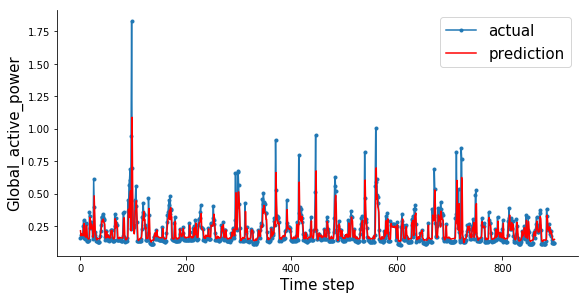

In [48]:
l = [x for x in range(900)]
plt.figure(figsize=(8,4))
plt.plot(l, Y_test[0][0:900], marker='.', label="actual")
plt.plot(l, test_predict[:,0][0:900], 'r', label="prediction")


plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

#### The model was created for the data from KWh usage of MAC000018
#### The same model can be trained for data from other users and get outputs

# Conclusion


---


- LSTM model is able to predict the electricity usage efficiently with relatively low error
- The model can be improved by:
    - Hypertuning the Parameters
    - Using a deeper network
    - Trying out different architectures
    - More importantly adding more data with attributes.
- Attributes like:
    - Weather Data
    - Number of people in the household
    - Geography of the place Can highly improve the predictions of the model.
    

---



